In [ ]:
import pandas as pd
import numpy as np
from numpy import reshape
from sklearn.linear_model import LinearRegression
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
import math 
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [ ]:
arquivo = pd.read_csv("USA_Housing.csv")

In [ ]:
print(arquivo.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [ ]:
arquivo.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [ ]:
arquivo.shape

(5000, 7)

In [ ]:
arquivo.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
arquivo.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [ ]:
arquivo2 = arquivo.drop(columns=['Address'])

In [ ]:
print(arquivo2.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


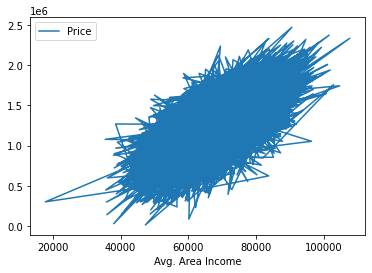

In [ ]:
arquivo2.plot("Avg. Area Income", "Price")

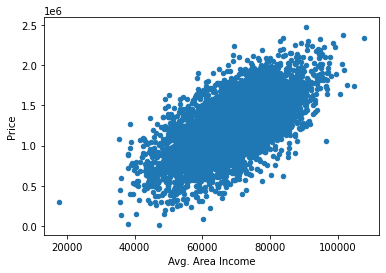

In [ ]:
arquivo2.plot.scatter("Avg. Area Income", "Price")

In [ ]:
arquivo3 = arquivo2.drop(columns=['Price'])

NORMALIZAR OS DADOS

In [ ]:
arquivo3 = pd.get_dummies(arquivo3)
arquivo3

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


SPLIT DOS DADOS 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(arquivo3, arquivo2.loc[:,['Price']], test_size = 0.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 0.37153698, -1.68957258, -0.92825377, -1.36471016, -0.94520478],
       [ 1.31945884,  0.55172879,  1.15648906,  1.06784544,  0.57337693],
       [-0.17621864,  1.46059157,  0.21286826,  1.75477974, -0.19332233],
       ...,
       [ 0.55792804, -1.33616288, -1.47304413, -0.73434691,  0.66866117],
       [-0.14207385, -1.23859623,  0.24553899, -0.69393901,  0.42723651],
       [ 0.18636249,  0.58585895, -0.44927296, -0.71010217,  1.55489443]])

In [ ]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))



[1036 3799 3474 ... 1742 2129 3407]
continuous
multiclass
multiclass


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


REGRESSAO LINEAR


In [ ]:
def reg_linear(x, y):
  regr = LinearRegression().fit(x, y)

  preds = regr.predict(x)
  rmse = mean_squared_error(y, preds)
  r2 = r2_score(y, preds)
  acc_lr = regr.score(x, y)
  print("RMSE:",rmse)
  print("R2:",r2)
  return acc_lr

In [ ]:
def scatter_lr(x, y):
  regr = LinearRegression().fit(x, y)
  preds = regr.predict(x)
  plt.scatter(x[:,0],y)
  plt.plot(x[:,0],preds)

ACURACIA CROSS VALIDATION

In [ ]:
def cross_val_func(x, y):
  preds_lr = cross_validate( LinearRegression(), x, y)
  acc_cv_lr = preds_lr.get('test_score')
  print("Cross validation with k = 5 Accuracy :", np.mean(acc_cv_lr))

In [ ]:
print("BASE TRAIN RESULTS AND METRICS: \n")
acc_train = reg_linear(x_train, y_train)
print("Linear Regression Accuracy:", acc_train)
cross_val_func(x_train, y_train)

print("BASE TEST RESULTS AND METRICS: \n")
acc_test = reg_linear(x_test, y_test)
print("Linear Regression Accuracy:", acc_test)
cross_val_func(x_test, y_test)

BASE TRAIN RESULTS AND METRICS: 

RMSE: 10142509393.22526
R2: 0.918855365037968
Linear Regression Accuracy: 0.918855365037968
Cross validation with k = 5 Accuracy : 0.9183994226310881
BASE TEST RESULTS AND METRICS: 

RMSE: 10437433770.232178
R2: 0.9153927773470812
Linear Regression Accuracy: 0.9153927773470812
Cross validation with k = 5 Accuracy : 0.9131127843162712


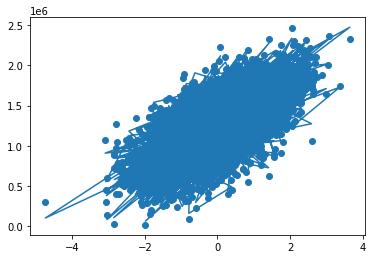

In [ ]:
scatter_lr(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


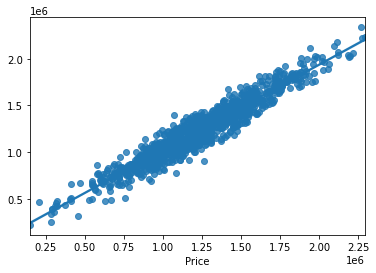

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


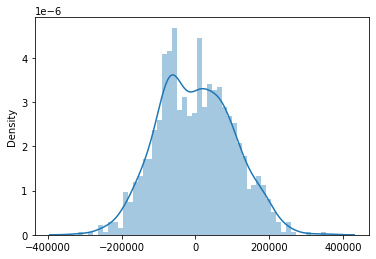

In [ ]:
import seaborn as sns
regr = LinearRegression().fit(x_test, y_test)
preds = regr.predict(x_test)
sns.regplot(y_test, preds)
plt.show()
sns.distplot((y_test-preds), bins=50)
plt.show()